In [38]:
import json
import numpy as np
from scipy import sparse
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
import glob

In [39]:
import json
import numpy as np
import matplotlib.pyplot as plt

def agresti_coull_intetrval(pair):
    # num trial n
    success = pair[0]
    fail = pair[1]
    rate = success / (success + fail)
    n = success + fail
    z = 2
    n_tilda = n  + z ** 2
    p_tilda = (1 / n_tilda) * (success + (z**2/2) )
    # conf_int_min = p_tilda + (z * (np.sqrt(  (p_tilda / n_tilda) * (1 - p_tilda) )))
    # conf_int_max = p_tilda - (z * (np.sqrt(  (p_tilda / n_tilda) * (1 - p_tilda) )))
    dif = (z * (np.sqrt(  (p_tilda / n_tilda) * (1 - p_tilda) )))
    # return [conf_int_min, rate, conf_int_max]
    # dif = conf_int_max - conf_int_min 
    return dif

def read_multiple_jsons(json_file_names):
    list_of_res = []
    for i in json_file_names:
        curve = json_to_data(i)
        list_of_res.append(curve)
    return list_of_res

def json_to_data(json_file_name):
    data = open(json_file_name)
    data = json.load(data)
    res = data['success_rate']
    
    rates = []
    errors = []
    
    for i in range(len(res)):
        num_success = res[i][0]
        num_fail = res[i][1]
        rate = num_fail / (num_success + num_fail)
        rates.append(rate)
        error = agresti_coull_intetrval([num_success, num_fail])
        errors.append(error)
    label = 'm=' + str(data['multiplexing']) + ' , strategy=' + str(data['strategy'])
    return res,rates,errors,label

def plot_multiple_data(list_of_res, phys_err, save=False, x_lim = False, y_lim = False):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    for i in list_of_res:
        ax.errorbar(phys_err, i[1], i[2], linewidth= 1, label = i[3])
    ax.set_yscale('log')
    ax.grid(which="major", alpha=0.6)
    ax.grid(which="minor", alpha=0.3)
    if x_lim != False:
        ax.set_xlim(x_lim[0], x_lim[1])
    if y_lim != False:
        ax.set_ylim(y_lim[0], y_lim[1])
    ax.set_xlabel("photon loss probability", fontsize = 15)
    ax.set_ylabel(r"logical $Z$ error probability", fontsize = 15)
    plt.style.use('tableau-colorblind10')
    plt.legend(loc='lower right', fontsize = 13)
    if save == True:
        filename = "multiplexed_toric"
        plt.savefig(filename + ".pdf")
    plt.show()

In [40]:
files = glob.glob("../1010/*")
files.sort()


In [41]:
files

['../1010/analyze.ipynb',
 '../1010/drawing.py',
 '../1010/result_10_10_0_1_100000_0.010000.json',
 '../1010/result_10_10_1_2_100000_0.010000.json',
 '../1010/result_10_10_2_2_100000_0.010000.json',
 '../1010/result_10_10_3_2_100000_0.010000.json',
 '../1010/result_10_10_4_2_100000_0.010000.json']

In [42]:
files = files[2:]
files

['../1010/result_10_10_0_1_100000_0.010000.json',
 '../1010/result_10_10_1_2_100000_0.010000.json',
 '../1010/result_10_10_2_2_100000_0.010000.json',
 '../1010/result_10_10_3_2_100000_0.010000.json',
 '../1010/result_10_10_4_2_100000_0.010000.json']

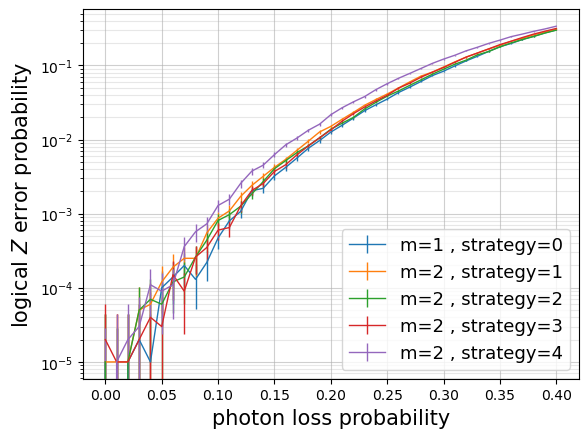

In [47]:
phys_err = [i*0.01 for i in range(41)]
list_of_res = read_multiple_jsons(files)
plot_multiple_data(list_of_res=list_of_res, phys_err=phys_err)

In [37]:
# // 0 without QM
# // 1 random
# // 2 random with threshold
# // 3 min distance
# // 4 max distance

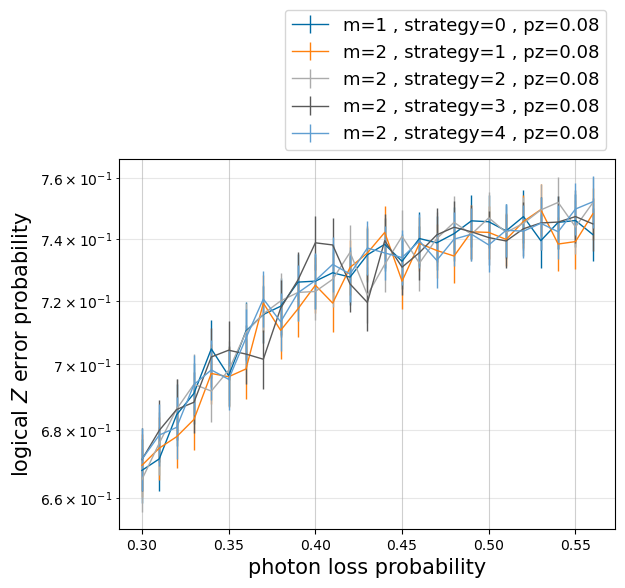

In [42]:
compare_prob_z(8)

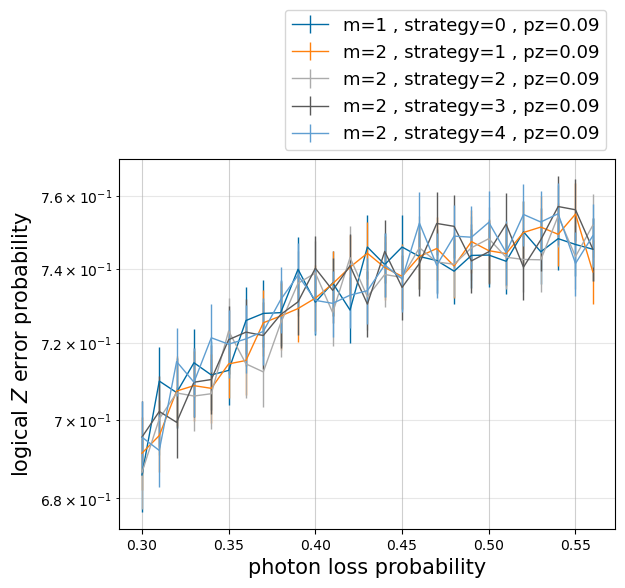

In [43]:
compare_prob_z(9)

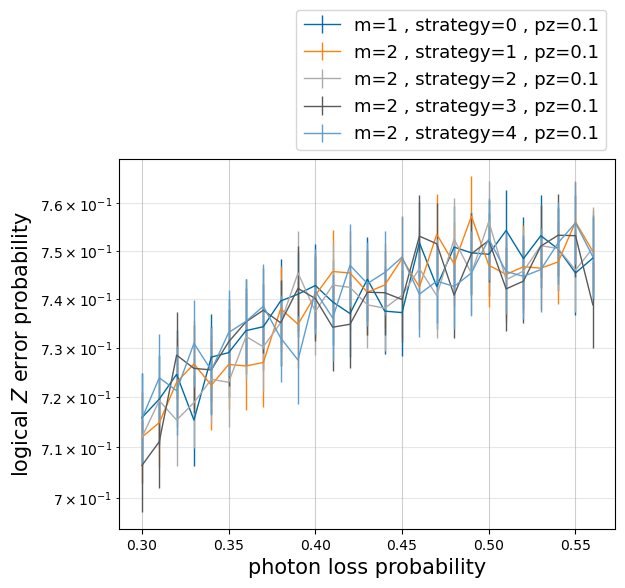

In [44]:
compare_prob_z(10)

In [ ]:
compare_prob_z(11)

In [19]:
# import json
# import numpy as np
# from scipy import sparse
# from scipy.sparse import csc_matrix
# import matplotlib.pyplot as plt

def agresti_coull_intetrval(pair):
    # num trial n
    success = pair[0]
    fail = pair[1]
    rate = success / (success + fail)
    n = success + fail
    z = 2
    n_tilda = n  + z ** 2
    p_tilda = (1 / n_tilda) * (success + (z**2/2) )
    # conf_int_min = p_tilda + (z * (np.sqrt(  (p_tilda / n_tilda) * (1 - p_tilda) )))
    # conf_int_max = p_tilda - (z * (np.sqrt(  (p_tilda / n_tilda) * (1 - p_tilda) )))
    dif = (z * (np.sqrt(  (p_tilda / n_tilda) * (1 - p_tilda) )))
    # return [conf_int_min, rate, conf_int_max]
    # dif = conf_int_max - conf_int_min 
    return dif

def read_multiple_jsons_st(json_file_names):
    list_of_res = []
    for i in json_file_names:
        curve = json_to_data_st(i)
        list_of_res.append(curve)
    return list_of_res

def json_to_data_st(json_file_name):
    data = open(json_file_name)
    data = json.load(data)
    res = data['success_rate']
    
    rates = []
    errors = []
    
    for i in range(len(res)):
        num_success = res[i][0]
        num_fail = res[i][1]
        rate = num_fail / (num_success + num_fail)
        rates.append(rate)
        error = agresti_coull_intetrval([num_success, num_fail])
        errors.append(error)
    label = 'm=' + str(data['multiplexing']) + ' , strategy=' + str(data['strategy']) + str(data['multiplexing']) + ' , pz=' + str(round(data['prob_z'], 3))
    return res,rates,errors,label,data['strategy'], data['multiplexing']

def strategy_index_to_name(st_index):
    if st_index == 0:
        st_name = '' # without QM
    elif st_index == 1:
        st_name = '(iii) random'
    elif st_index == 2:
        st_name = '(iv) random + threshold'
    elif st_index == 3:
        st_name = '(i) Min distance'
    elif st_index == 4:
        st_name = '(ii) Max distance'
    elif st_index == 5:
        st_name = 'random_with_occupation_enhancement_for_each_photon'
    elif st_index == 6:
        st_name = 'random_with_occupation_enhancement'
    elif st_index == 7:
        st_name = r'(v) $X$ stabilizer' # 'star even'
    elif st_index == 8:
        st_name = r'(v) $X$ stabilizer' #'star odd'
    elif st_index == 9:
        st_name = r'(v) $Z$ stabilizer' # 'plaquette even'
    elif st_index == 10:
        st_name = r'(v) $Z$ stabilizer' #'plaquette odd'
    elif st_index == 11:
        st_name = '(v) Mixed stabilizer'
    else:
        st_name = 'unknown'
    return st_name

def plot_multiple_data_strategies(list_of_res, phys_err, save = False, grid = True, log = False, strategy_name = True, colors = None, markers = None, xlim = None):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    cindex = 0
    mindex = 0


    for i in list_of_res:
        cindex = cindex + 1
        mindex = mindex + 1
        if strategy_name == True:
            if i[5] == 1:
                m_name = 'm = ' + str(i[5]) + ', '
            else:
                m_name = ""
            st_name = strategy_index_to_name(i[4]) 

            if markers == None:
                marker  = None
            else: 
                marker = markers[mindex]

            if colors != None:
                color = colors[cindex]
                if st_name == '':
                    ax.errorbar(phys_err, i[1], i[2], linewidth= 1, label = m_name, color = color, marker = marker, markersize = 4, alpha = 0.7)
                else:
                    ax.errorbar(phys_err, i[1], i[2], linewidth= 1, label = m_name + st_name, color = color, marker = marker, markersize = 4, alpha = 0.7)
            else:
                ax.errorbar(phys_err, i[1], i[2], linewidth= 1, label = m_name + st_name, marker = marker, markersize = 4, alpha = 0.5)
        else:
            if markers == None:
                marker  = None
            else: 
                marker = markers[mindex]
            if colors != None:
                color = colors[cindex]
                ax.errorbar(phys_err, i[1], i[2], linewidth= 1, label = i[3], color = color, marker = marker, markersize = 4, alpha = 0.7)
            else:
                ax.errorbar(phys_err, i[1], i[2], linewidth= 1, label = i[3], marker = marker, markersize = 4, alpha = 0.7)
    if grid == True:
        ax.grid(which="major", alpha=0.6)
        ax.grid(which="minor", alpha=0.3)
    if log == True:
        ax.set_yscale('log')
    ax.set_xlabel("photon loss probability", fontsize = 15)
    ax.set_ylabel(r"logical $Z$ error probability", fontsize = 15)

    if xlim != None:
        ax.set_xlim(xlim[0],xlim[1])
    else:
        ax.set_xlim(0, 1)
    ax.set_ylim(0.001, 1)
    plt.style.use('tableau-colorblind10')
    plt.legend(loc='lower right', fontsize = 13)
    if save == True:
        filename = "multiplexed_toric"
        plt.savefig(filename + ".pdf")
    plt.show()

65


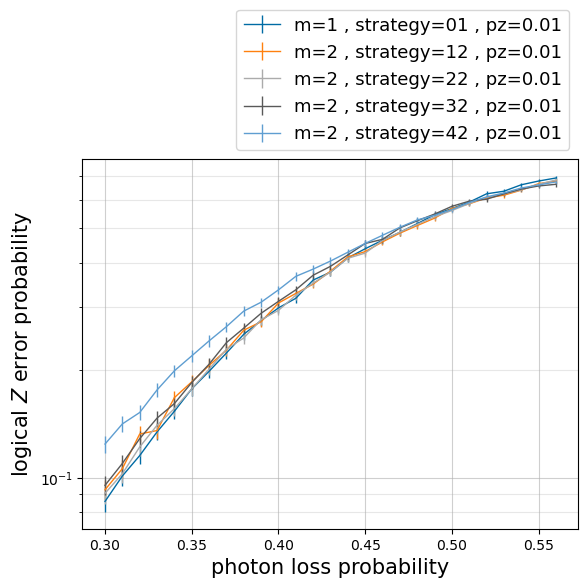

In [20]:
print(len(files))
e = 1
compare = []
for i in range(5):
    compare.append(files[i*13+e])

phys_err = [i*0.01+0.3 for i in range(27)]
list_of_res = read_multiple_jsons_st(compare)
plot_multiple_data(list_of_res=list_of_res, phys_err=phys_err)

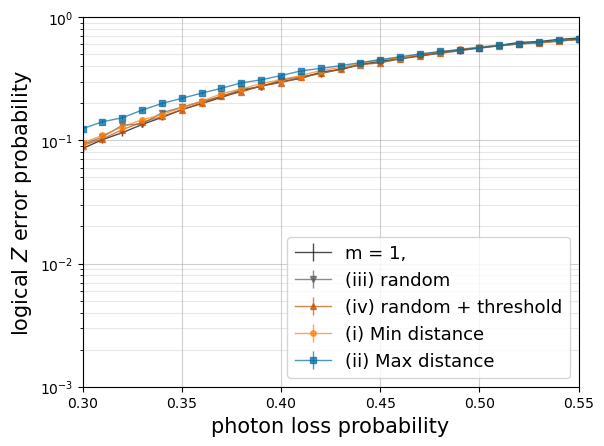

In [16]:
# import glob
# files = glob.glob("../combined_10000shots/011/*")
# for file in files:
#     print(file)

# files = [files[2],files[1], files[4], files[0],files[3]]
list_of_res = read_multiple_jsons(compare)
phys_err = [i*0.01 + 0.3 for i in range(27)]
colors = ['C0','black','C3', 'C5', 'C1', 'C0','C5']
markers = ['None', 'None', 'v', '^', 'o', 's',"$M$", 'None']
plot_multiple_data(list_of_res=list_of_res, phys_err=phys_err, save = True, log =True, grid = True, strategy_name = True, colors = colors, markers= markers, xlim=[0.3, 0.55])